In [7]:
import os
os.chdir("C:/Users/mcnellie/Dropbox/Spring 2017/BCB  546X/Python/python homework")
print(os.getcwd())

from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
    
##1##
def get_sequences_from_file(fasta_fn): #naming function and listing required inputs
    sequence_data_dict = {} #creates an empty dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): #starts the loops. Will go through every SeqRecord created by using SeqIO.parse and extract desired information
        description = record.description.split() #string split the column named which is the 'record.description'
        species_name = description[1] + " " + description[2] #pastes together the first and second elements from the split to create a species name
        sequence_data_dict[species_name] = record.seq #adds the species name and the corresponding sequence (record.seq) to the dictionary
    return(sequence_data_dict) #end of loop, returns output



C:\Users\mcnellie\Dropbox\Spring 2017\BCB 546X\Python\python homework


In [3]:
##2##
def translate_function(string_nucleotides): #naming function and listing required inputs
    mito_table = CodonTable.unambiguous_dna_by_id[2] #creates a CodonTable named 'mito_table' that corresponds to Vertebrate Mitochondrial 
    aa_seq_string=list() #empty list to be filled in with amino acids by the loop
    for i in range(0,len(string_nucleotides),3): #starting loop and defining the range to loop over
        if (string_nucleotides[i:i+3]) not in mito_table.stop_codons: #Will not translate a stop codon. I should have coded this differently I realize, the loop should end ('break') if it reaches a stop codon not skip over it as I have it coded
            aa_seq_string.append(mito_table.forward_table[str(string_nucleotides[i:i+3])]) #takes the 3 nucleotide sequence ([i:i+3]), looks up codon in table, and adds result to list
    return(aa_seq_string) #returns list of amino acids

In [4]:
##3##
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna
def better_translate(string_nucleotides):#naming function and listing required inputs
    string_nucleotides=Seq(string_nucleotides, generic_dna) #takes the input, a string of nucleotides (string_nucleotides) and changes format to DNA sequence
    aa_seq_string=str(string_nucleotides.translate(table="Vertebrate Mitochondrial")) #translates the whole sequence at once (instead of using range) to ammino acids
    return aa_seq_string #returns output


In [5]:
##4##
def get_proportion_aa_type_function(aa_seq): #naming function and listing required inputs
    charged = ['R','K','D','E'] #lists charged amino acids
    polar = ['Q','N','H','S','T','Y','C','M','W'] #lists polar amino acids
    hydrophobic = ['A','I','L','F','V','P','G'] #lists hydrophobic amino acids
    num_charged=0 #creating an empty (equal to zero) object to be used in the loop
    num_polar=0 #creating an empty (equal to zero) object to be used in the loop
    num_hydro=0 #creating an empty (equal to zero) object to be used in the loop
    for letter in list(set(aa_seq)): #starting loop. Will take each unique amino acids present (set() extracts unique values in random order), tests which catagory of amino acids it belongs and count the number of times that letter appears in the sequence and add that amount to total number of amino acids of that type.  
        if letter in charged: #testing if amino acid is charge
            num_charged = num_charged + aa_seq.count(letter) #counting number of times the amino acid appears in the sequence and adds it an object tracking the number of amino acids of that type.
        elif letter in polar: #testing if amino acid is polar
            num_polar = num_polar + aa_seq.count(letter) #counting number of times the amino acid appears in the sequence and adds it an object tracking the number of amino acids of that type.
        elif letter in hydrophobic: #testing if amino acid is hydrophobic
            num_hydro = num_hydro + aa_seq.count(letter) #counting number of times the amino acid appears in the sequence and adds it an object tracking the number of amino acids of that type.
    return num_charged/(len(aa_seq)-1), num_polar/(len(aa_seq)-1), num_hydro/(len(aa_seq)-1) #returns the total number of amino acids belonging to each of the three types and divided by the total number of amino acids


In [10]:
##5##
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") #loading DNA sequences for 9 bear species
bear_df = pd.read_csv("bears_data.csv") # Includes only data for body mass currently and empty cells for other columns
species_list = list(bear_df.species)

row_track=0
for key, value in cytb_seqs.items():#setting up the loop to go over all keys and their values in the dictionary cytb_seqs
    aa_seq = better_translate(str(value))#translates the DNA sequence of the value into amino acids
    bear_df.iloc[row_track,2]=get_proportion_aa_type_function(aa_seq)[0] #calculates the proportion of charged amino acids and saves it in the bear_df
    bear_df.iloc[row_track,3]=get_proportion_aa_type_function(aa_seq)[1] #calculates the proportion of polar amino acids and saves it in the bear_df
    bear_df.iloc[row_track,4]=get_proportion_aa_type_function(aa_seq)[2] #calculates the proportion of hydrophobic amino acids and saves it in the bear_df
    row_track=row_track + 1 #increases row number so results from next loop will be saved in correct location
%matplotlib inline

#another loop, how I did it orginally before I went back and re-read the question. Not sure if it is any better or worse...
for i in range(0,len(bear_df.index)):
    bear_df.iloc[i,2]=get_proportion_aa_type_function(better_translate(str(cytb_seqs[bear_df.iloc[i,0]])))[0]
    bear_df.iloc[i,3]=get_proportion_aa_type_function(better_translate(str(cytb_seqs[bear_df.iloc[i,0]])))[1]
    bear_df.iloc[i,4]=get_proportion_aa_type_function(better_translate(str(cytb_seqs[bear_df.iloc[i,0]])))[2]


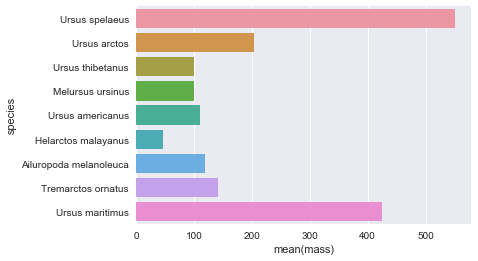

In [15]:
##6##
#bear_df.plot(x='species', y='mass', kind='bar')

#another way
import seaborn as sns
bear_mass_plot=sns.barplot(x='mass',y='species', data=bear_df)

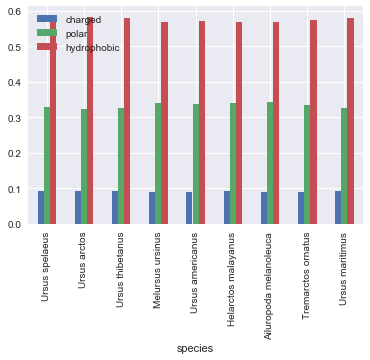

In [13]:
## 7 ##
bears2=bear_df.loc[:,('species', 'charged', 'polar', 'hydrophobic')]#pulling out columns of interest
bears2.plot(x='species',kind='bar')

In [14]:
## 8 ##
bear_df.to_csv("bears_mass_cytb.csv", index=False)